# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

## <span style="color:red"> To make the notebook more readable by avoiding lengthy code cells, they are hidden by default, can be toggled by buttons under every major graph

### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.
3. In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
6. Do not forget to use **periodic boundary contitions** every time it is appropriate!

This will help you, especially in the equilibration phases of your simulations.

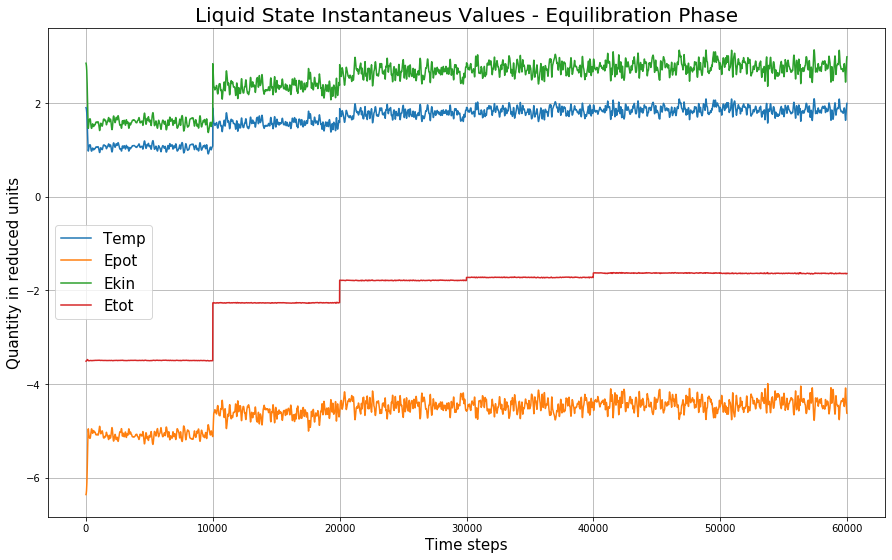

In [48]:
import numpy as np
from matplotlib import pyplot as plt

temp = np.loadtxt("es4.3/solid_eq/1/output_temp.dat")
ekin = np.loadtxt("es4.3/solid_eq/1/output_ekin.dat")
epot = np.loadtxt("es4.3/solid_eq/1/output_epot.dat")
etot = np.loadtxt("es4.3/solid_eq/1/output_etot.dat")

for i in range(2,6+1):
    appot = np.loadtxt("es4.3/solid_eq/"+str(i)+"/output_temp.dat")
    appok = np.loadtxt("es4.3/solid_eq/"+str(i)+"/output_ekin.dat")
    appop = np.loadtxt("es4.3/solid_eq/"+str(i)+"/output_epot.dat")
    appoe = np.loadtxt("es4.3/solid_eq/"+str(i)+"/output_etot.dat")
    temp = np.append(temp,appot)
    ekin = np.append(ekin,appok)
    epot = np.append(epot,appop)
    etot = np.append(etot,appoe)
    
x=np.arange(len(temp))
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(1,1,1)

ax.plot(10*x,temp)
ax.plot(10*x,epot)
ax.plot(10*x,ekin)
ax.plot(10*x,etot)
ax.grid('on')
ax.legend(["Temp","Epot","Ekin","Etot"],fontsize = 15)
ax.set_title("Liquid State Instantaneus Values - Equilibration Phase",fontsize = 20)
ax.set_xlabel("Time steps",fontsize = 15)
ax.set_ylabel("Quantity in reduced units",fontsize = 15)
#ax.set_xticks(np.arange(0,1000,50))
plt.show()

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')#

**As the graph above shows, equilibration for the liquid state is reached after 5/6 cycles of 10000 steps.<br>I won't include the analogue picture for solid and gas, but the time needed is similar.**

### Exercise 04.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

In [4]:
Ekin= np.loadtxt('es4/ave_ekin.out')
Epot= np.loadtxt('es4/ave_epot.out')
Temp= np.loadtxt('es4/ave_temp.out')
Etot= np.loadtxt('es4/ave_etot.out')
print("Averages for Liquid State\n" + "Kinetic Energy: " + str(Ekin[0]) + " +/- " + str(Ekin[1]))
print("Potential Energy: " + str(Epot[0])+ " +/- " + str(Epot[1]))
print("Total Energy: " + str(Etot[0])+ " +/- " + str(Etot[1]))
print("Temperature: " + str(Temp[0])+ " +/- " + str(Temp[1]))

Averages for Liquid State
Kinetic Energy: 6.85668e-309 +/- 2.63039e-157
Potential Energy: 6.85668e-309 +/- 2.63686e-157
Total Energy: 4.63116e-309 +/- 2.63686e-157
Temperature: -0.269894 +/- nan


### Exercise 04.3

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

# Solid State

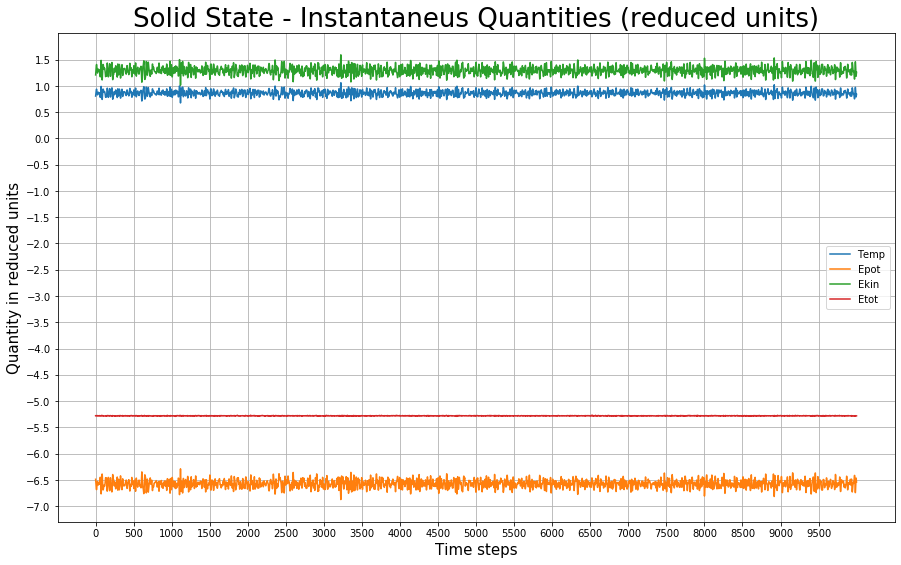

In [17]:
temp = np.loadtxt("es4.3/solid/output_temp.dat")
ekin = np.loadtxt("es4.3/solid/output_ekin.dat")
epot = np.loadtxt("es4.3/solid/output_epot.dat")
etot = np.loadtxt("es4.3/solid/output_etot.dat")

x=np.arange(len(temp))
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(1,1,1)

ax.plot(10*x,temp)
ax.plot(10*x,epot)
ax.plot(10*x,ekin)
ax.plot(10*x,etot)
ax.grid('on')
ax.legend(["Temp","Epot","Ekin","Etot"])
ax.set_title("Solid State - Instantaneus Quantities (reduced units)",fontsize = 26)
ax.set_xlabel("Time steps",fontsize = 15)
ax.set_ylabel("Quantity in reduced units",fontsize = 15)
ax.set_xticks(np.arange(0,100000,5000))
ax.set_yticks(np.arange(-7,2,0.5))
plt.show()

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')10*

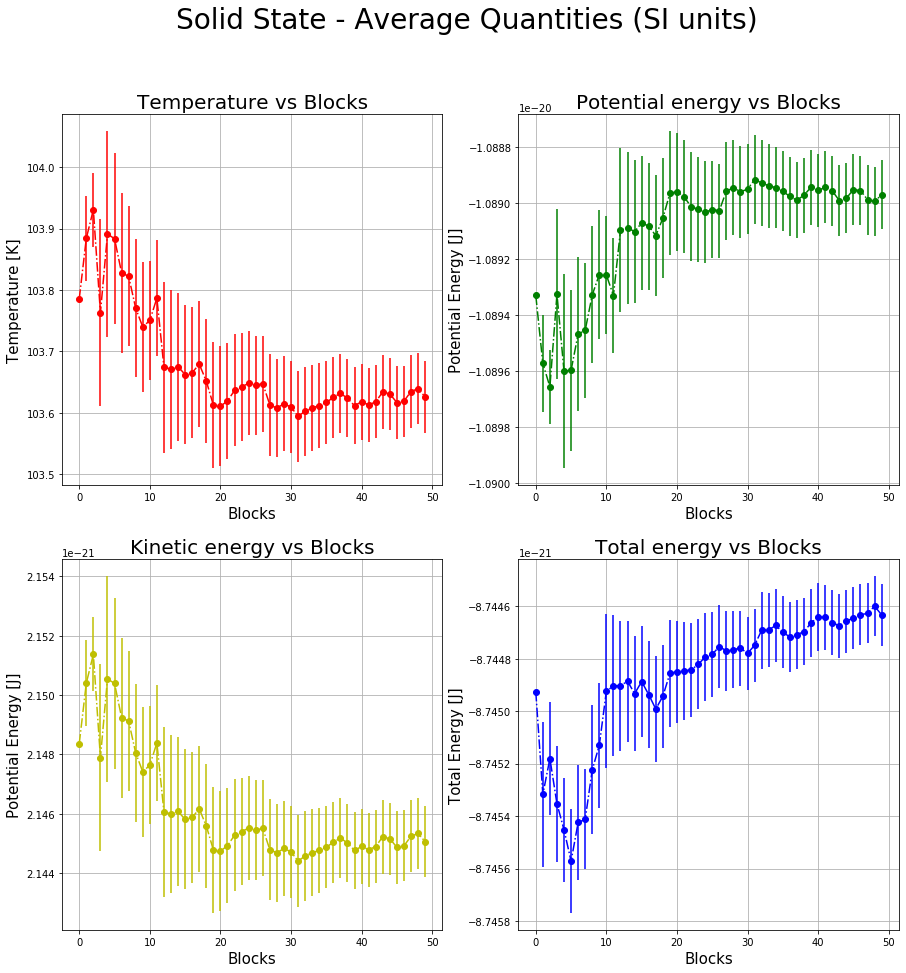

In [51]:
temp = np.loadtxt("es4.3/solid/output_temp.dat")
ekin = np.loadtxt("es4.3/solid/output_ekin.dat")
epot = np.loadtxt("es4.3/solid/output_epot.dat")
etot = np.loadtxt("es4.3/solid/output_etot.dat")

N = len(temp)# total data
M = 50 # number of blocks
L = int(N/M)

eps_over_Kb = 120 # units for conversion to SI
Kb = 1.38e-23

temp_ave= np.zeros(M)  # temperature
prog_temp= np.zeros(M)
prog_temp2=np.zeros(M)
err_temp=np.zeros(M)

epot_ave= np.zeros(M)  # potential energy
prog_epot= np.zeros(M)
prog_epot2=np.zeros(M)
err_epot=np.zeros(M)

ekin_ave= np.zeros(M)  # kinetic energy
prog_ekin= np.zeros(M)
prog_ekin2=np.zeros(M)
err_ekin=np.zeros(M)

etot_ave= np.zeros(M)  # total energy
prog_etot= np.zeros(M)
prog_etot2=np.zeros(M)
err_etot=np.zeros(M)



for iblock in range(M):
    for istep in range(L):
        temp_ave[iblock]+= temp[L*iblock + istep]
    temp_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_temp[iblock]+=temp_ave[i]
        prog_temp2[iblock]+=temp_ave[i]**2
    prog_temp[iblock]/=(iblock+1)
    prog_temp2[iblock]/=(iblock+1)
    err_temp[iblock] = np.sqrt((prog_temp2[iblock]-prog_temp[iblock]**2)/(iblock+1))

for iblock in range(M):
    for istep in range(L):
        epot_ave[iblock]+= epot[L*iblock + istep]
    epot_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_epot[iblock]+=epot_ave[i]
        prog_epot2[iblock]+=epot_ave[i]**2
    prog_epot[iblock]/=(iblock+1)
    prog_epot2[iblock]/=(iblock+1)
    err_epot[iblock] = np.sqrt((prog_epot2[iblock]-prog_epot[iblock]**2)/(iblock+1))
    
for iblock in range(M):
    for istep in range(L):
        ekin_ave[iblock]+= ekin[L*iblock + istep]
    ekin_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_ekin[iblock]+=ekin_ave[i]
        prog_ekin2[iblock]+=ekin_ave[i]**2
    prog_ekin[iblock]/=(iblock+1)
    prog_ekin2[iblock]/=(iblock+1)
    err_ekin[iblock] = np.sqrt((prog_ekin2[iblock]-prog_ekin[iblock]**2)/(iblock+1))
    
for iblock in range(M):
    for istep in range(L):
        etot_ave[iblock]+= etot[L*iblock + istep]
    etot_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_etot[iblock]+=etot_ave[i]
        prog_etot2[iblock]+=etot_ave[i]**2
    prog_etot[iblock]/=(iblock+1)
    prog_etot2[iblock]/=(iblock+1)
    err_etot[iblock] = np.sqrt((prog_etot2[iblock]-prog_etot[iblock]**2)/(iblock+1))
    
    
x = np.arange(M)

fig = plt.figure(figsize=(15,15))

fig.suptitle('Solid State - Average Quantities (SI units)', fontsize = 28)

ax1 = fig.add_subplot(221)
ax1.errorbar(x,prog_temp * eps_over_Kb,yerr = err_temp * eps_over_Kb,fmt='ro-.')
ax1.grid()
ax1.set_title('Temperature vs Blocks',fontsize = 20)
ax1.set_xlabel('Blocks',fontsize = 15)
ax1.set_ylabel('Temperature [K]',fontsize = 15)

ax2 = fig.add_subplot(222)
ax2.errorbar(x,prog_epot * eps_over_Kb * Kb,yerr = err_epot * eps_over_Kb * Kb,fmt='go-.')
ax2.grid()
ax2.set_title('Potential energy vs Blocks',fontsize = 20)
ax2.set_xlabel('Blocks',fontsize = 15)
ax2.set_ylabel('Potential Energy [J]',fontsize = 15)

ax3 = fig.add_subplot(223)
ax3.errorbar(x,prog_ekin * eps_over_Kb * Kb,yerr = err_ekin * eps_over_Kb * Kb,fmt='yo-.')
ax3.grid()
ax3.set_title('Kinetic energy vs Blocks',fontsize = 20)
ax3.set_xlabel('Blocks',fontsize = 15)
ax3.set_ylabel('Potential Energy [J]',fontsize = 15)

ax4 = fig.add_subplot(224)
ax4.errorbar(x,prog_etot * eps_over_Kb * Kb,yerr = err_etot * eps_over_Kb * Kb,fmt='bo-.')
ax4.grid()
ax4.set_title('Total energy vs Blocks',fontsize = 20)
ax4.set_xlabel('Blocks',fontsize = 15)
ax4.set_ylabel('Total Energy [J]',fontsize = 15)



plt.show()

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

**Below are the final average values for the solid state (in reduced units)**

In [49]:
Ekin= np.loadtxt('es4.3/solid/ave_ekin.out')
Epot= np.loadtxt('es4.3/solid/ave_epot.out')
Temp= np.loadtxt('es4.3/solid/ave_temp.out')
Etot= np.loadtxt('es4.3/solid/ave_etot.out')
print("\t\tAverages for Solid State\n" + "Kinetic Energy: " + str(Ekin[0]) + " ± " + str(Ekin[1]))
print("Potential:\t" + str(Epot[0])+ " ± " + str(Epot[1]))
print("Total Energy:\t" + str(Etot[0])+ " ± " + str(Etot[1]))
print("Temperature:\t" + str(Temp[0])+ " ± " + str(Temp[1]))

		Averages for Solid State
Kinetic Energy: 1.28247 ± 0.0129099
Potential:	-6.51023 ± 0.0654344
Total Energy:	-5.22775 ± 0.0525409
Temperature:	0.854983 ± 0.00860662


# Liquid State

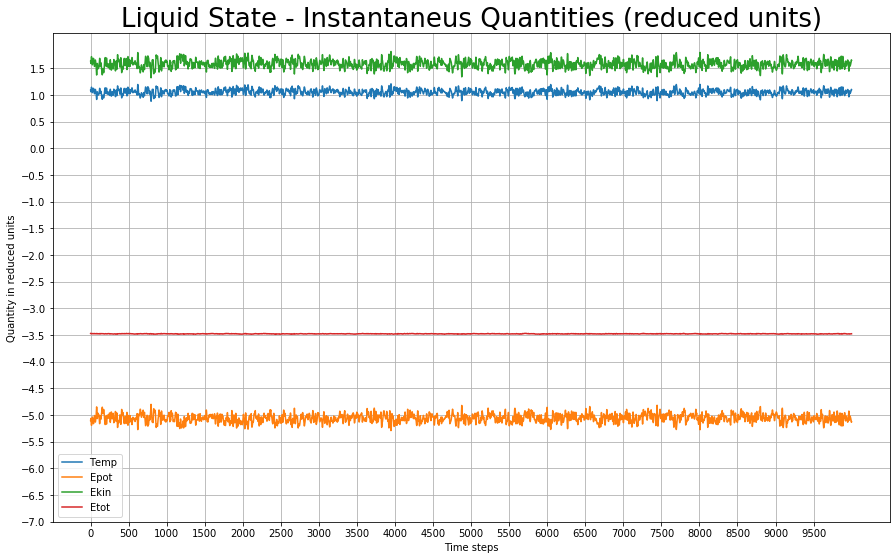

In [11]:
temp = np.loadtxt("es4.3/liquid/output_temp.dat")
ekin = np.loadtxt("es4.3/liquid/output_ekin.dat")
epot = np.loadtxt("es4.3/liquid/output_epot.dat")
etot = np.loadtxt("es4.3/liquid/output_etot.dat")

x=np.arange(10000)
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(1,1,1)

ax.plot(10*x,temp)
ax.plot(10*x,epot)
ax.plot(10*x,ekin)
ax.plot(10*x,etot)
ax.grid('on')
ax.legend(["Temp","Epot","Ekin","Etot"])
ax.set_title("Liquid State - Instantaneus Quantities (reduced units)",fontsize = 26)
ax.set_xlabel("Time steps")
ax.set_ylabel("Quantity in reduced units")
ax.set_xticks(np.arange(0,100000,5000))
ax.set_yticks(np.arange(-7,2,0.5))
plt.show()

##############################

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

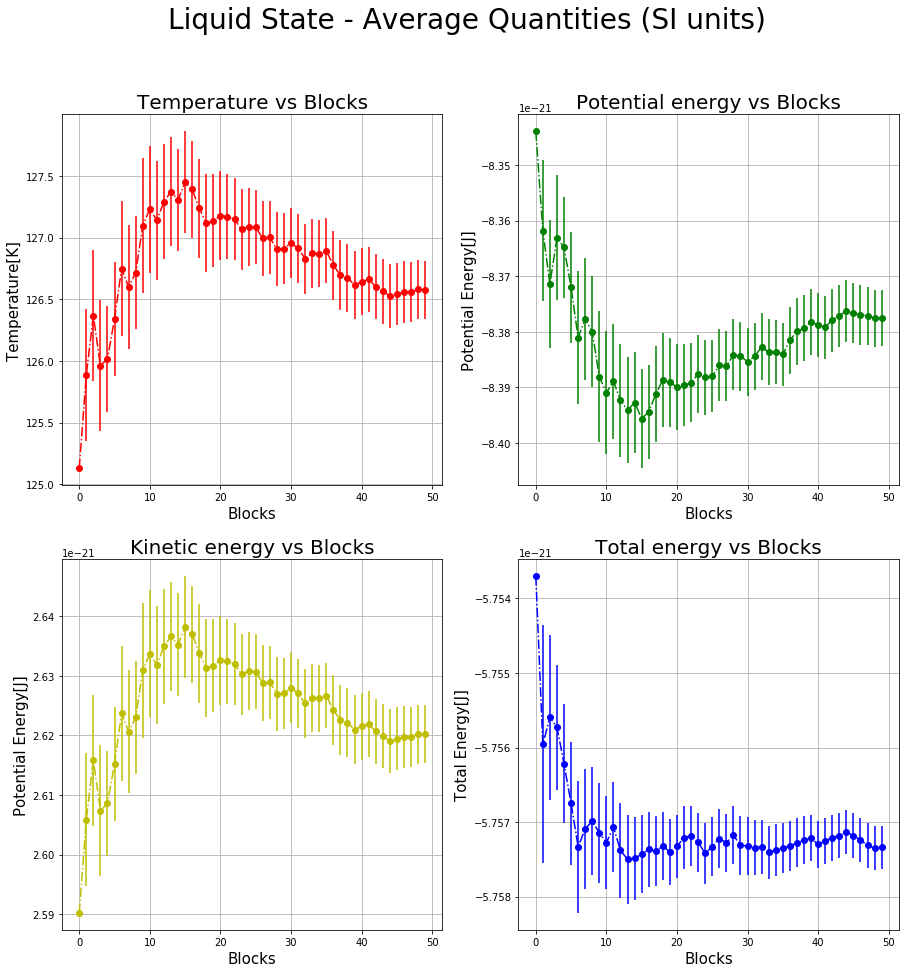

In [15]:
temp = np.loadtxt("es4.3/liquid/output_temp.dat")
ekin = np.loadtxt("es4.3/liquid/output_ekin.dat")
epot = np.loadtxt("es4.3/liquid/output_epot.dat")
etot = np.loadtxt("es4.3/liquid/output_etot.dat")

N = len(temp)# total data
M = 50 # number of blocks
L = int(N/M)

eps_over_Kb = 120 # units for conversion to SI
Kb = 1.38e-23

temp_ave= np.zeros(M)  # temperature
prog_temp= np.zeros(M)
prog_temp2=np.zeros(M)
err_temp=np.zeros(M)

epot_ave= np.zeros(M)  # potential energy
prog_epot= np.zeros(M)
prog_epot2=np.zeros(M)
err_epot=np.zeros(M)

ekin_ave= np.zeros(M)  # kinetic energy
prog_ekin= np.zeros(M)
prog_ekin2=np.zeros(M)
err_ekin=np.zeros(M)

etot_ave= np.zeros(M)  # total energy
prog_etot= np.zeros(M)
prog_etot2=np.zeros(M)
err_etot=np.zeros(M)



for iblock in range(M):
    for istep in range(L):
        temp_ave[iblock]+= temp[L*iblock + istep]
    temp_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_temp[iblock]+=temp_ave[i]
        prog_temp2[iblock]+=temp_ave[i]**2
    prog_temp[iblock]/=(iblock+1)
    prog_temp2[iblock]/=(iblock+1)
    err_temp[iblock] = np.sqrt((prog_temp2[iblock]-prog_temp[iblock]**2)/(iblock+1))

for iblock in range(M):
    for istep in range(L):
        epot_ave[iblock]+= epot[L*iblock + istep]
    epot_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_epot[iblock]+=epot_ave[i]
        prog_epot2[iblock]+=epot_ave[i]**2
    prog_epot[iblock]/=(iblock+1)
    prog_epot2[iblock]/=(iblock+1)
    err_epot[iblock] = np.sqrt((prog_epot2[iblock]-prog_epot[iblock]**2)/(iblock+1))
    
for iblock in range(M):
    for istep in range(L):
        ekin_ave[iblock]+= ekin[L*iblock + istep]
    ekin_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_ekin[iblock]+=ekin_ave[i]
        prog_ekin2[iblock]+=ekin_ave[i]**2
    prog_ekin[iblock]/=(iblock+1)
    prog_ekin2[iblock]/=(iblock+1)
    err_ekin[iblock] = np.sqrt((prog_ekin2[iblock]-prog_ekin[iblock]**2)/(iblock+1))
    
for iblock in range(M):
    for istep in range(L):
        etot_ave[iblock]+= etot[L*iblock + istep]
    etot_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_etot[iblock]+=etot_ave[i]
        prog_etot2[iblock]+=etot_ave[i]**2
    prog_etot[iblock]/=(iblock+1)
    prog_etot2[iblock]/=(iblock+1)
    err_etot[iblock] = np.sqrt((prog_etot2[iblock]-prog_etot[iblock]**2)/(iblock+1))
    
    
x = np.arange(M)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Liquid State - Average Quantities (SI units)', fontsize = 28)

ax1 = fig.add_subplot(221)
ax1.errorbar(x,prog_temp* eps_over_Kb,yerr = err_temp* eps_over_Kb,fmt='ro-.')
ax1.grid()
ax1.set_title('Temperature vs Blocks',fontsize = 20)
ax1.set_xlabel('Blocks',fontsize = 15)
ax1.set_ylabel('Temperature [K]',fontsize = 15)

ax2 = fig.add_subplot(222)
ax2.errorbar(x,prog_epot* eps_over_Kb * Kb,yerr = err_epot* eps_over_Kb * Kb,fmt='go-.')
ax2.grid()
ax2.set_title('Potential energy vs Blocks',fontsize = 20)
ax2.set_xlabel('Blocks',fontsize = 15)
ax2.set_ylabel('Potential Energy [J]',fontsize = 15)

ax3 = fig.add_subplot(223)
ax3.errorbar(x,prog_ekin* eps_over_Kb * Kb,yerr = err_ekin* eps_over_Kb * Kb,fmt='yo-.')
ax3.grid()
ax3.set_title('Kinetic energy vs Blocks',fontsize = 20)
ax3.set_xlabel('Blocks',fontsize = 15)
ax3.set_ylabel('Potential Energy [J]',fontsize = 15)

ax4 = fig.add_subplot(224)
ax4.errorbar(x,prog_etot* eps_over_Kb * Kb,yerr = err_etot* eps_over_Kb * Kb,fmt='bo-.')
ax4.grid()
ax4.set_title('Total energy vs Blocks',fontsize = 20)
ax4.set_xlabel('Blocks',fontsize = 15)
ax4.set_ylabel('Total Energy [J]',fontsize = 15)



plt.show()

##############################

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Gas State

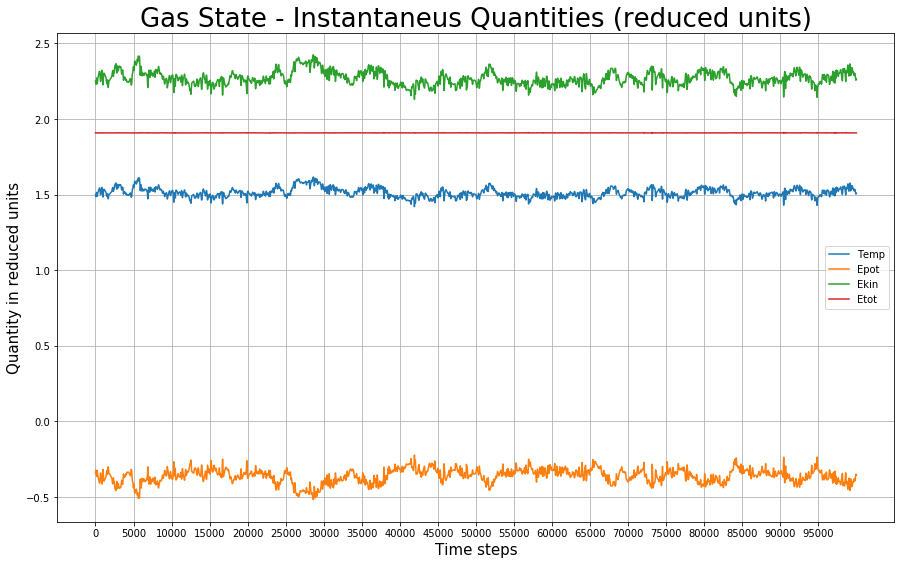

In [53]:
temp = np.loadtxt("es4.3/gas/output_temp.dat")
ekin = np.loadtxt("es4.3/gas/output_ekin.dat")
epot = np.loadtxt("es4.3/gas/output_epot.dat")
etot = np.loadtxt("es4.3/gas/output_etot.dat")

x=np.arange(len(temp))
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(1,1,1)

ax.plot(10*x,temp)
ax.plot(10*x,epot)
ax.plot(10*x,ekin)
ax.plot(10*x,etot)
ax.grid('on')
ax.legend(["Temp","Epot","Ekin","Etot"])
ax.set_title("Gas State - Instantaneus Quantities (reduced units)",fontsize = 26)
ax.set_xlabel("Time steps",fontsize = 15)
ax.set_ylabel("Quantity in reduced units",fontsize = 15)
ax.set_xticks(np.arange(0,100000,5000))
plt.show()

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

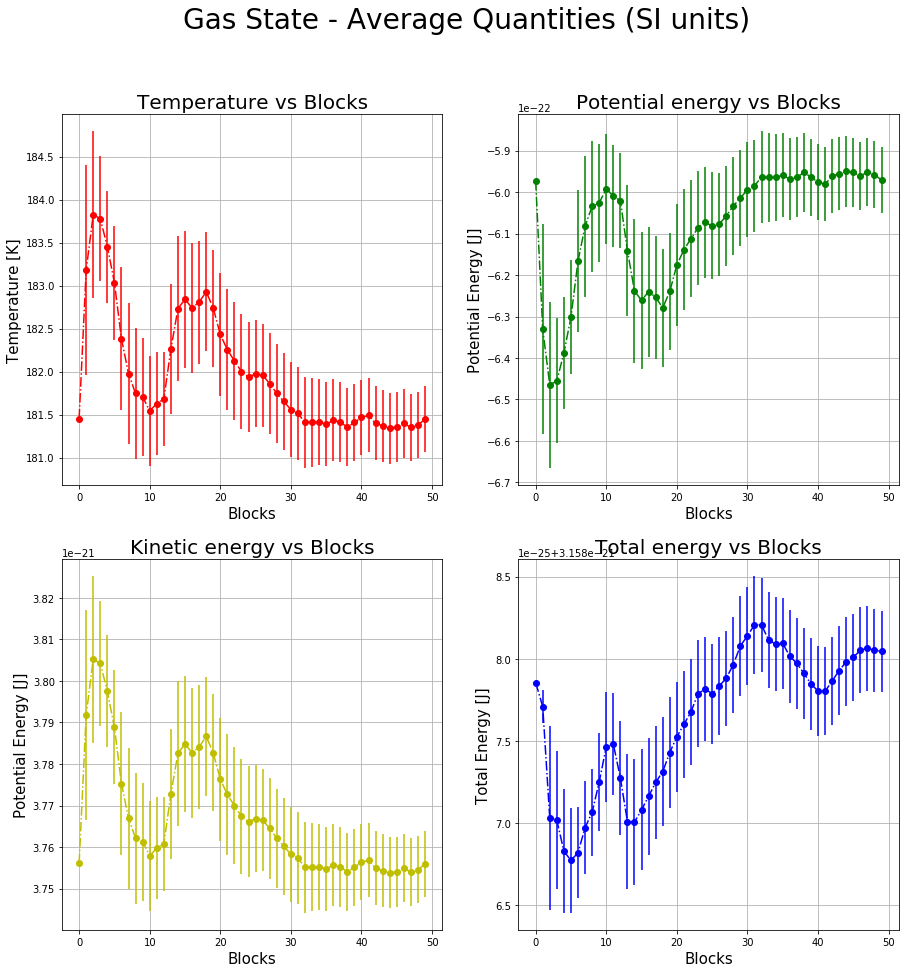

In [26]:
temp = np.loadtxt("es4.3/gas/output_temp.dat")
ekin = np.loadtxt("es4.3/gas/output_ekin.dat")
epot = np.loadtxt("es4.3/gas/output_epot.dat")
etot = np.loadtxt("es4.3/gas/output_etot.dat")

N = len(temp)# total data
M = 50 # number of blocks
L = int(N/M)

eps_over_Kb = 120 # units for conversion to SI
Kb = 1.38e-23

temp_ave= np.zeros(M)  # temperature
prog_temp= np.zeros(M)
prog_temp2=np.zeros(M)
err_temp=np.zeros(M)

epot_ave= np.zeros(M)  # potential energy
prog_epot= np.zeros(M)
prog_epot2=np.zeros(M)
err_epot=np.zeros(M)

ekin_ave= np.zeros(M)  # kinetic energy
prog_ekin= np.zeros(M)
prog_ekin2=np.zeros(M)
err_ekin=np.zeros(M)

etot_ave= np.zeros(M)  # total energy
prog_etot= np.zeros(M)
prog_etot2=np.zeros(M)
err_etot=np.zeros(M)



for iblock in range(M):
    for istep in range(L):
        temp_ave[iblock]+= temp[L*iblock + istep]
    temp_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_temp[iblock]+=temp_ave[i]
        prog_temp2[iblock]+=temp_ave[i]**2
    prog_temp[iblock]/=(iblock+1)
    prog_temp2[iblock]/=(iblock+1)
    err_temp[iblock] = np.sqrt((prog_temp2[iblock]-prog_temp[iblock]**2)/(iblock+1))

for iblock in range(M):
    for istep in range(L):
        epot_ave[iblock]+= epot[L*iblock + istep]
    epot_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_epot[iblock]+=epot_ave[i]
        prog_epot2[iblock]+=epot_ave[i]**2
    prog_epot[iblock]/=(iblock+1)
    prog_epot2[iblock]/=(iblock+1)
    err_epot[iblock] = np.sqrt((prog_epot2[iblock]-prog_epot[iblock]**2)/(iblock+1))
    
for iblock in range(M):
    for istep in range(L):
        ekin_ave[iblock]+= ekin[L*iblock + istep]
    ekin_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_ekin[iblock]+=ekin_ave[i]
        prog_ekin2[iblock]+=ekin_ave[i]**2
    prog_ekin[iblock]/=(iblock+1)
    prog_ekin2[iblock]/=(iblock+1)
    err_ekin[iblock] = np.sqrt((prog_ekin2[iblock]-prog_ekin[iblock]**2)/(iblock+1))
    
for iblock in range(M):
    for istep in range(L):
        etot_ave[iblock]+= etot[L*iblock + istep]
    etot_ave[iblock]/=L
    for i in range(0,iblock+1):
        prog_etot[iblock]+=etot_ave[i]
        prog_etot2[iblock]+=etot_ave[i]**2
    prog_etot[iblock]/=(iblock+1)
    prog_etot2[iblock]/=(iblock+1)
    err_etot[iblock] = np.sqrt((prog_etot2[iblock]-prog_etot[iblock]**2)/(iblock+1))
    
    
x = np.arange(M)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Gas State - Average Quantities (SI units)', fontsize = 28)

ax1 = fig.add_subplot(221)
ax1.errorbar(x,prog_temp* eps_over_Kb,yerr = err_temp* eps_over_Kb,fmt='ro-.')
ax1.grid()
ax1.set_title('Temperature vs Blocks',fontsize = 20)
ax1.set_xlabel('Blocks',fontsize = 15)
ax1.set_ylabel('Temperature [K]',fontsize = 15)

ax2 = fig.add_subplot(222)
ax2.errorbar(x,prog_epot* eps_over_Kb * Kb,yerr = err_epot* eps_over_Kb * Kb,fmt='go-.')
ax2.grid()
ax2.set_title('Potential energy vs Blocks',fontsize = 20)
ax2.set_xlabel('Blocks',fontsize = 15)
ax2.set_ylabel('Potential Energy [J]',fontsize = 15)

ax3 = fig.add_subplot(223)
ax3.errorbar(x,prog_ekin* eps_over_Kb * Kb,yerr = err_ekin* eps_over_Kb * Kb,fmt='yo-.')
ax3.grid()
ax3.set_title('Kinetic energy vs Blocks',fontsize = 20)
ax3.set_xlabel('Blocks',fontsize = 15)
ax3.set_ylabel('Potential Energy [J]',fontsize = 15)

ax4 = fig.add_subplot(224)
ax4.errorbar(x,prog_etot* eps_over_Kb * Kb,yerr = err_etot* eps_over_Kb * Kb,fmt='bo-.')
ax4.grid()
ax4.set_title('Total energy vs Blocks',fontsize = 20)
ax4.set_xlabel('Blocks',fontsize = 15)
ax4.set_ylabel('Total Energy [J]',fontsize = 15)



plt.show()

##############################

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


### <span style="color:green"> Optional exercise</span>

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: istantaneous values, average values and uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$